In [ ]:
%matplotlib inline

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.polynomial import Polynomial
import sympy
import re

# Basic Algebra Exercise
## Functions, Polynomials, Complex Numbers. Applications of Abstract Algebra

### Problem 1. Polynomial Interpolation
We know that if we have a set of $n$ data points with coordinates $(x_1; y_1), (x_2; y_2), \dots, (x_n; y_n)$, we can try to figure out what function may have generated these points.

Please note that **our assumptions about the data** will lead us to choosing one function over another. This means that our results are as good as our data and assumptions. Therefore, it's extremely important that we write down our assumptions (which sometimes can be difficult as we sometimes don't realize we're making them). It will be better for our readers if they know what those assumptions and models are.

In this case, we'll state two assumptions:
1. The points in our dataset are generated by a polynomial function
2. The points are very precise, there is absolutely no error in them. This means that the function should pass **through every point**

This method is called *polynomial interpolation* (*"polynomial"* captures assumption 1 and *"interpolation"* captures assumption 2).

It can be proved (look at [Wikipedia](https://en.wikipedia.org/wiki/Polynomial_interpolation) for example) that if we have $n$ data points, there is only one polynomial of degree $n-1$ which passes through them. In "math speak": "the vector spaces of $n$ points and polynomials of degree $n-1$ are isomorphic (there exists a bijection mapping one to the other)".

There are a lot of ways to do interpolation. We can also write the function ourselves if we want but this requires quite a lot more knowledge than we already covered in this course. So we'll use a function which does this for us. `numpy.polyfit()` is one such function. It accepts three main parameters (there are others as well, but they are optional): a list of $x$ coordinates, a list of $y$ coordinates, and a polynomial degree.

Let's say we have these points:
```python
points = np.array([(0, 0), (1, 0.8), (2, 0.9), (3, 0.1), (4, -0.8), (5, -1.0)])
```

First, we need to "extract" the coordinates:
```python
x = points[:, 0]
y = points[:, 1]
```

Then, we need to calculate the interpolating polynomial. For the degree, we'll initially set $n-1$:
```python
poly = np.polynomial.polynomial.Polynomial.fit(...)
# TODO: Find a way to make the line shorter; call the correct arguments
```

After that, we need to plot the function. To do this, we'll create a range of $x$ values and evaluate the polynomial at each value:
```python
plot_x = np.linspace(np.min(x), np.max(x), 1000) # If you want, pass the number of points as a parameter
plot_y = poly(plot_x)
```

Finally, we need to plot the result. We'll plot both the fitting polynomial curve (using `plt.plot()`) and the points (using `plt.scatter`). It's also nice to have different colors to make the line stand out from the points.
```python
plt.plot(plot_x, plot_y, c = "green")
plt.scatter(x, y)
plt.xlabel("x")
plt.ylabel("y")
plt.show()
```
Don't forget to label the axes!

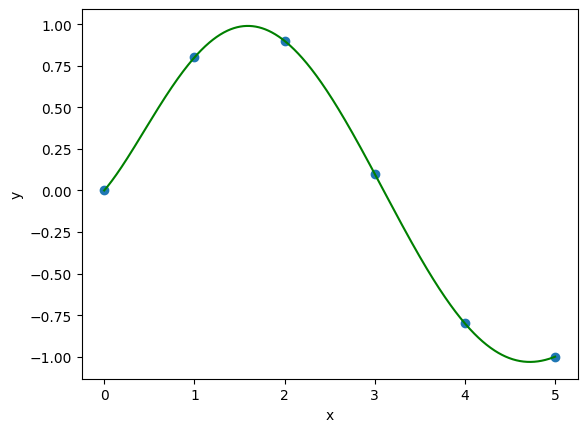

In [12]:
points = np.array([(0, 0), (1, 0.8), (2, 0.9), (3, 0.1), (4, -0.8), (5, -1.0)])
x, y = points[:, 0], points[:, 1]

poly = Polynomial.fit(x, y, deg = len(points) - 1)

plot_x = np.linspace(np.min(x), np.max(x), 1000) 
plot_y = poly(plot_x)
plt.plot(plot_x, plot_y, c = "green")
plt.scatter(x, y)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

Your task now is to **wrap the code in a function**. It should accept a list of points, the polynomial degree, min and max value of $x$ used for plotting. 

**Be extremely careful to ensure that the function uses its parameters!** Of course, you can extract other utility functions if you wish (e.g., separating plotting from the rest is a good idea).

We'll use this function to try some other cases.

In [25]:
def interpolate_polynomial(points, degree, min_x, max_x):
    """
    Interpolates a polynomial of the specified degree through the given points and plots it
    points - a list of points (x, y) to plot
    degree - the polynomial degree
    min_x, max_x - range of x values used to plot the interpolating polynomial
    """

    NUM_POINTS = 1000
    
    points = np.array(points)
    x, y = points[:, 0], points[:, 1]


    poly = Polynomial.fit(x, y, deg=degree)

    plot_x = np.linspace(min_x, max_x, NUM_POINTS)
    plot_y = poly(plot_x)

    plt.plot(plot_x, plot_y, color="green")
    plt.scatter(x, y, color="red", label="Data points", zorder=3)
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend()
    plt.title(f"Polynomial Interpolation (Degree {degree})")
    plt.show()

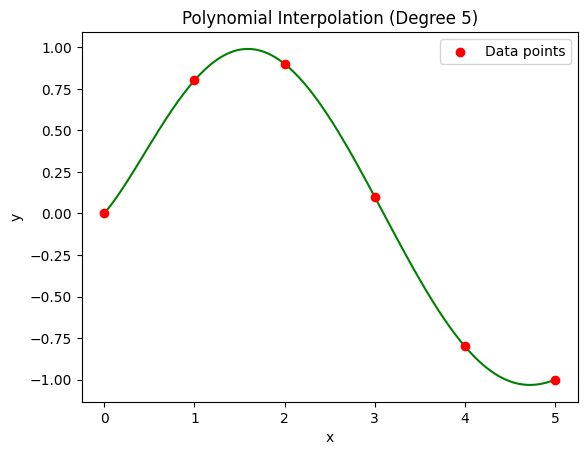

In [26]:
points = np.array([(0, 0), (1, 0.8), (2, 0.9), (3, 0.1), (4, -0.8), (5, -1.0)])
interpolate_polynomial(points, len(points) - 1, np.min(points[:, 0]), np.max(points[:, 0]))

We see this is a very nice fit. This is expected, of course. Let's try to expand our view a little. Let's try to plot other values of $x$, further than the original ones. This is **extrapolation**.

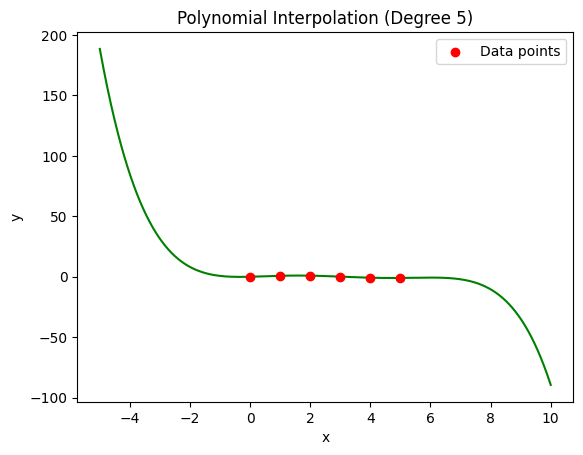

In [27]:
interpolate_polynomial(points, len(points) - 1, -5, 10)

Hmmm... it seems our polynomial goes a little wild outside the original range. This is to show how **extrapolation can be quite dangerous**.

Let's try a lower polynomial degree now. We used 4, how about 3, 2 and 1?
**Note:** We can add titles to every plot so that we know what exactly we're doing. Te title may be passed as an additional parameter to our function.

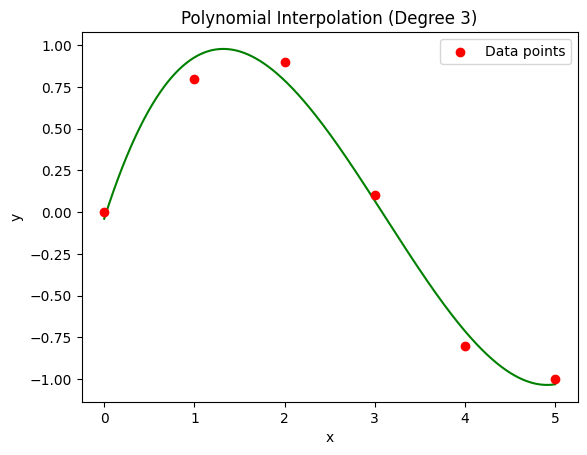

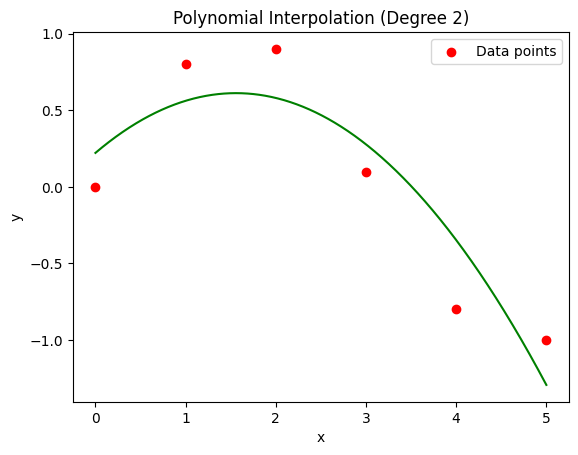

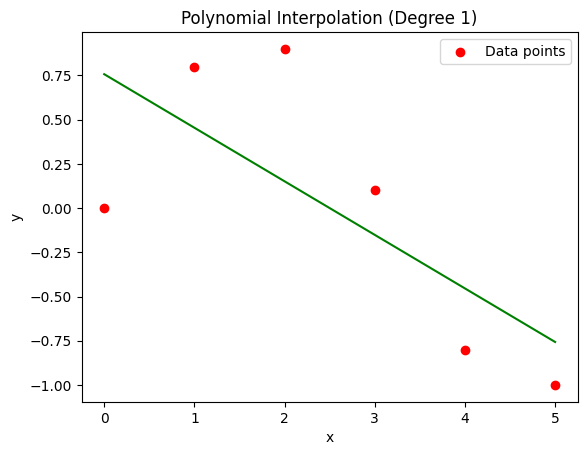

In [28]:
interpolate_polynomial(points, 3, np.min(points[:, 0]), np.max(points[:, 0]))
interpolate_polynomial(points, 2, np.min(points[:, 0]), np.max(points[:, 0]))
interpolate_polynomial(points, 1, np.min(points[:, 0]), np.max(points[:, 0]))

We see the fitting curves (or line in the last case) struggle more and more and they don't pass through every point. This breaks our assumptions but it can be very useful.

Okay, one more thing. How about increasing the degree? Let's try 5, 7 and 10. Python might complain a little, just ignore it, everything is fine... sort of :).

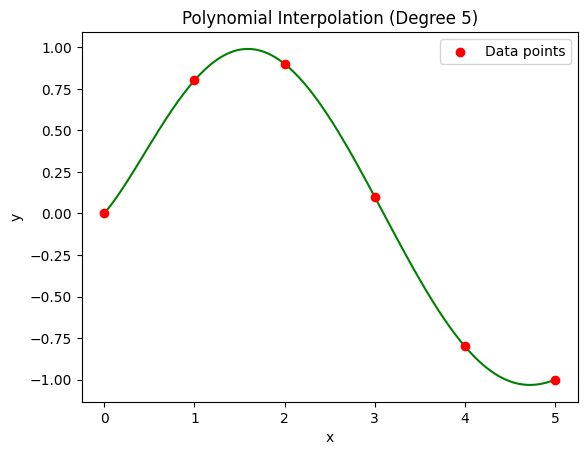

C:\Users\Owner\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\polynomial\polynomial.py:1362: RankWarning: The fit may be poorly conditioned
  return pu._fit(polyvander, x, y, deg, rcond, full, w)


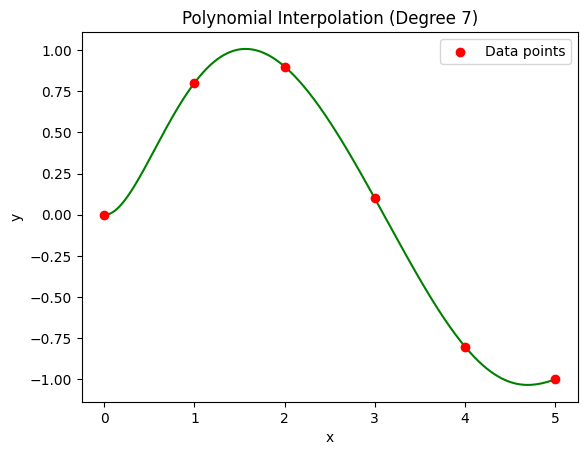

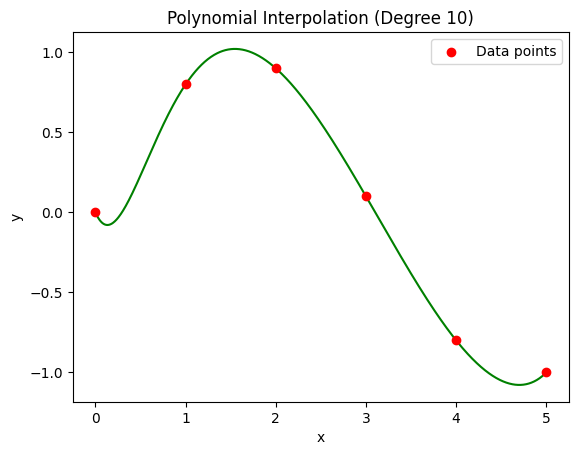

In [29]:
interpolate_polynomial(points, 5, np.min(points[:, 0]), np.max(points[:, 0]))
interpolate_polynomial(points, 7, np.min(points[:, 0]), np.max(points[:, 0]))
interpolate_polynomial(points, 10, np.min(points[:, 0]), np.max(points[:, 0]))

Those graphs look pretty much the same. But that's the point exactly. I'm being quite sneaky here. Let's try to expand our view once again and see what our results really look like.

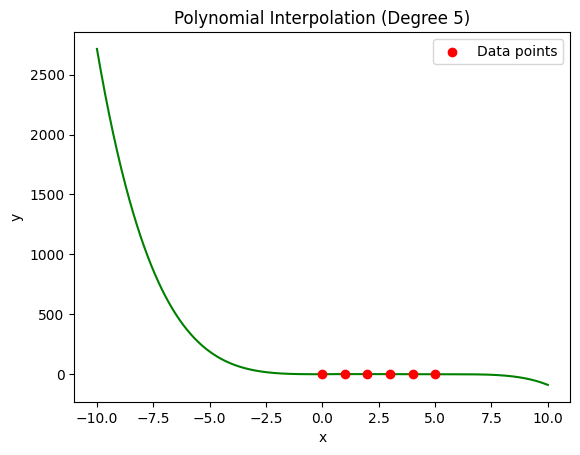

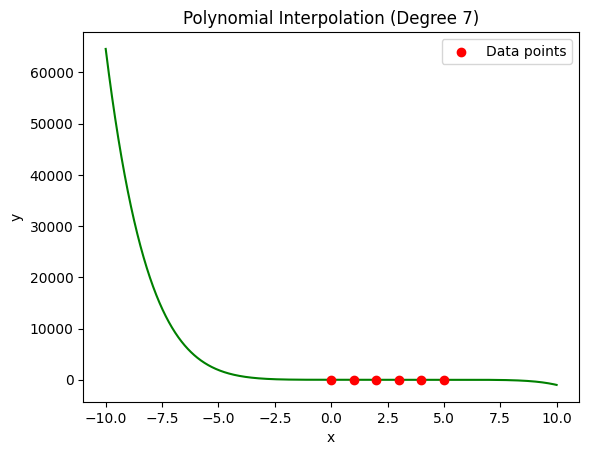

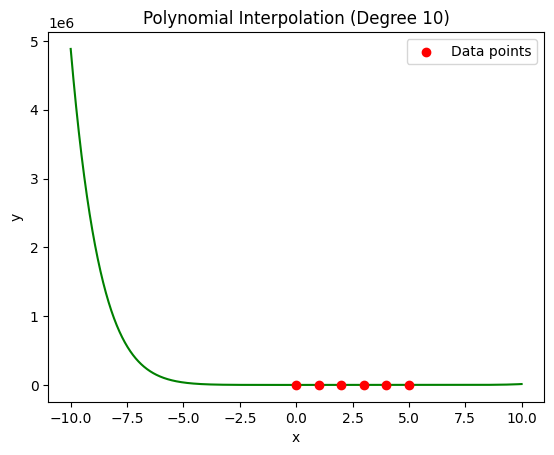

In [30]:
interpolate_polynomial(points, 5, -10, 10)
interpolate_polynomial(points, 7, -10, 10)
interpolate_polynomial(points, 10, -10, 10)

Now we see there are very wild differences. Even though the first two plots look quite similar, look at the $y$ values - they're quite different.

So, these are the dangers of interpolation. Use a too high degree, and you get "the polynomial wiggle". These are all meant to represent **the same** data points but they look insanely different. Here's one more comparison.

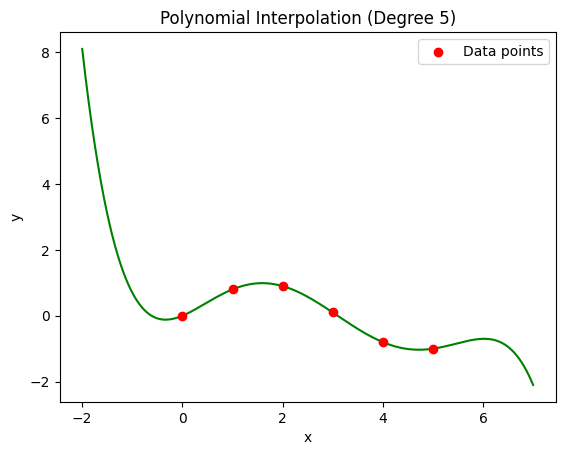

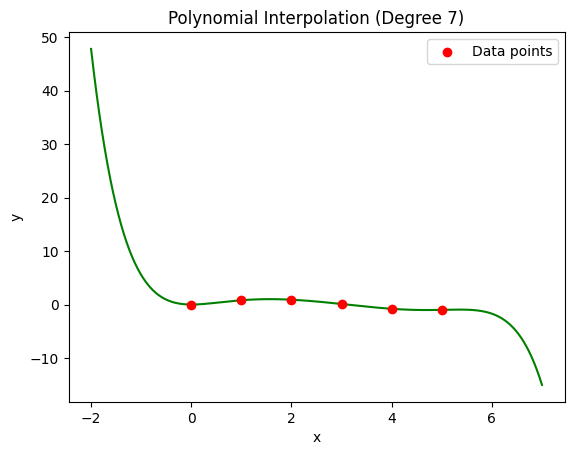

In [31]:
interpolate_polynomial(points, len(points) - 1, -2, 7)
interpolate_polynomial(points, len(points) + 1, -2, 7)

Now we can see what big difference even a small change in degree can make. This is why we have to choose our interpolating functions very carefully. Generally, a lower degree means a simpler function, which is to be preferred. See [Occam's razor](https://en.wikipedia.org/wiki/Occam%27s_razor).

To illustrate this, let's use the following set of points. What degree do you think would be the most reasonable? What are the coefficents of the interpolation?

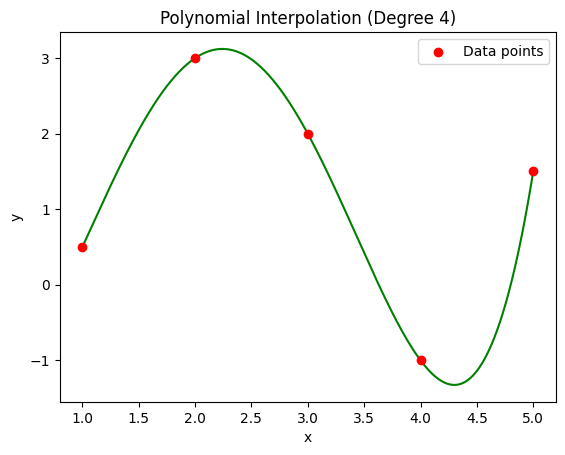

In [33]:
points = np.array([(1, 0.5), (2, 3), (3, 2), (4, -1), (5, 1.5)])
interpolate_polynomial(points, len(points) - 1, np.min(points[:,0]), np.max(points[:,0]))

Now let's add one more point. What can you observe now?

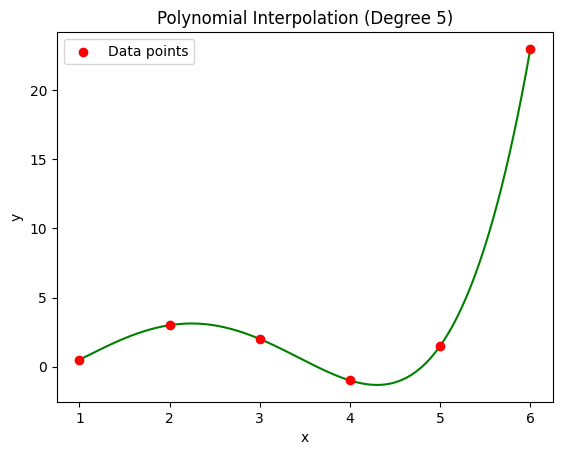

In [34]:
points = np.array([(1, 0.5), (2, 3), (3, 2), (4, -1), (5, 1.5), (6, 23)])
interpolate_polynomial(points, len(points) - 1, np.min(points[:,0]), np.max(points[:,0]))

Finally, **we need to be very careful about our assumptions**. Have a look at this situation:

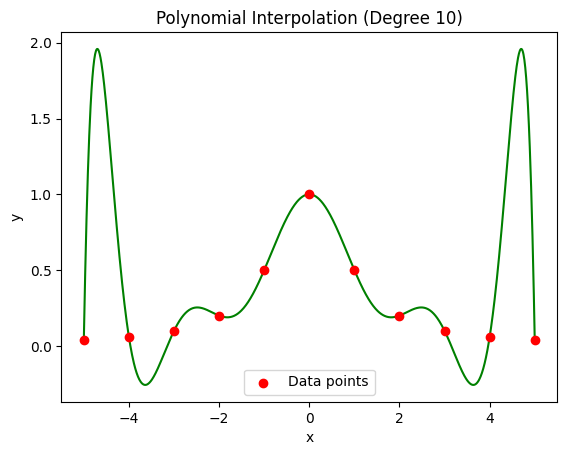

In [35]:
points = np.array([(-5, 0.03846), (-4, 0.05882), (-3, 0.1), (-2, 0.2), (-1, 0.5), (0, 1), (1, 0.5), (2, 0.2), (3, 0.1), (4, 0.05882), (5, 0.03846)])
interpolate_polynomial(points, len(points) - 1, np.min(points[:, 0]), np.max(points[:, 0]))

This plot definitely looks strange... This is because the generating function is not a polynomial. It's actually:
$$ y = \frac{1}{1 + x^2} $$

Plot the polynomial interpolation and the real generating function **on the same plot**. You may need to modify the original plotting function or just copy its contents.

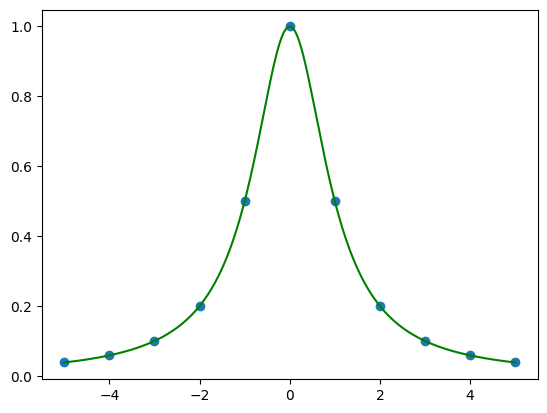

In [39]:
x_final = np.linspace(-5, 5, 1000)
y_final = 1 / (1 + x_final ** 2)

plt.scatter(points[:, 0], points[:, 1])
plt.plot(x_final, y_final, c = "g")
plt.show()

### Problem 2. Set Equivalence Theory
Have you played Sudoku? It used to be quite popular, and it still is; with boards that range from very simple to extremely complex. From random grannies, to the most brilliant computer scientists and mathematicians - everyone can get a kick out of a well-made puzzle. Sudoku has a lot of variants which make solving very fun and challenging, but let's focus on the classic variant now.

In the game, you must fill a 9x9 board with digits 1-9, once each in every row, every column, and every 3x3 region (or "box", or sometimes called "house"). You can find some example boards [here](https://sandiway.arizona.edu/sudoku/examples.html).

One of the most interesting solcing techniques comes from the so-called SET (or set equivalence theory; we love recursive acronyms...). It consists of finding set unions and intersections which lead to equivalent sets. Let's look at an example:
1. Consider $S_1 = R_1 \cup R_2$ - 2 sets of digits 1-9 in some order
2. Also consider $S_2 = C_1 \cup C_2$ - also 2 sets of digits 1-9 in some order
3. $\{R1C1, R1C2, R2C1, R2C2\} \in S_1 \cap S_2$
4. Since we started with identical sets and removed the same elements from both, the remaining elements (colored red and blue in the figure below) must also be the same. We don't know the order, but we know they **must** contain the same digits.

![An example of SET](sudoku.png)

Now, use this newly acquired knowledge to prove the following two figures.

Find appropriate sets, think about unions, intersections, and differences (e.g., in the figure above, the colored squares represent the differences of the sets). I think you should be able to outline a proof using LaTeX only, but a coding solution would also work. You're free to choose the approach.

a) **Phistomefel's Ring**. Prove that the set of red cells contains the same numbers as the set of blue cells.

![Phistomefel's ring](phistomefel.png)

b) **Aad (van de Wettering)'s Set**. Prove that the set of red cells contains the same numbers as the blue cells + 1 full set of the digits 1-9.

![Aad's set](aad.png)

# Set Equivalence in Sudoku: Phistomefel's Ring and Aad's Set

## Phistomefel's Ring

### Step 1: Define the Sets  
In this scenario, we define two sets:  
-  $S_1$ represents the **digits in the red cells**.
- $S_2$ represents the **digits in the blue cells**.

These sets correspond to the cells that form a loop in the Sudoku puzzle. By **Sudoku rules**, each **row, column, and 3x3 region** contains every digit \( \{1,2,3,4,5,6,7,8,9\} \) exactly once.

### Step 2: Understanding the Relations Between the Sets  
Next, we observe that the red and blue cells form overlapping regions in terms of their positions. To clarify the relation, consider the following:

- Let $R_1$ and $R_2$ be two **selected rows** that intersect in certain cells.
- Let $C_1$ and $C_2$ be two **selected columns** that also intersect.

Thus, the sets $S_1$ and $S_2$ can be represented as:

\
$S_1 = R_1 \cup R_2, \quad S_2 = C_1 \cup C_2$


### Step 3: Applying Sudoku Constraints  
Since the Sudoku rules dictate that every digit appears **exactly once per row, column, and region**, we can infer that:

- The red and blue cells must contain the **same set of digits** because they share common rows and columns.
- Therefore, when we remove the **identical elements** from both sets, we arrive at:


$S_1 \setminus S_2 = S_2 \setminus S_1$


### Conclusion  
By the above relation, the red and blue cells must contain the **same digits**. Therefore, we conclude that:


$S_1 = S_2$


---

## Aad’s Set

### Step 1: Define the Sets  
Now, we analyze Aad's set, where we again define two sets:  
- $S_1$ represents the digits in the **red cells**.
- $S_2$ represents the digits in the **blue cells**.

In this case, the structure of the puzzle is different in that the red cells contain an additional row-column intersection that contributes an extra full set of digits \( \{1, 2, 3, 4, 5, 6, 7, 8, 9\} \).

### Step 2: Analyzing the Set Structure  
By considering the extra intersection in the red cells, we can express the relation as:

\[
$S_1 = S_2 \cup \{1, 2, 3, 4, 5, 6, 7, 8, 9\}$
\]

This shows that the red cells contain **all the digits of the blue cells**, plus one extra full set of digits.

### Conclusion  
This result proves that the red set contains the same digits as the blue set, **plus an additional complete set** of \( \{1, 2, 3, 4, 5, 6, 7, 8, 9\} \). Thus, we have the relationship:

\
$S_1 = S_2 \cup \{1, 2, 3, 4, 5, 6, 7, 8, 9\}$



### Problem 3. Complex Numbers as Vectors
We saw that a complex number $z = a + bi$ is equivalent to (and therefore can be represented as) the ordered tuple $(a; b)$, which can be plotted in a 2D space. So, complex numbers and 2D points are equivalent. What is more, we can draw a vector from the origin of the coordinate plane to our point. This is called a point's **radius-vector**.

Let's try plotting complex numbers as radius vectors. Don't forget to label the real and imaginary axes. Also, move the axes to the origin. Hint: These are called "spines"; you'll need to move 2 of them to the origin and remove the other 2 completely. Hint 2: You already did this in the previous lab.

We can use `plt.quiver()` to plot the vector. It can behave a bit strangely, so we'll need to set the scale of the vectors to be the same as the scale on the graph axes:
```python
plt.quiver(0, 0, z.real, z.imag, angles = "xy", scale_units = "xy", scale = 1)
```

Other than that, the main parameters are: $x_{begin}$, $y_{begin}$, $x_{length}$, $y_{length}$ in that order.

Now, set the aspect ratio of the axes to be equal. Also, add grid lines. Set the axis numbers (called ticks) to be something like `range(-3, 4)` for now.
```python
plt.xticks(range(-4, 4))
plt.yticks(range(-4, 4))

```

If you wish to, you can be a bit more clever with the tick marks. Find the minimal and maximal $x$ and $y$ values and set the ticks according to them. It's a good practice not to jam the plot too much, so leave a little bit of space. That is, if the actual x-range is $[-2; 2]$, set the plotting to be $[-2.5; 2.5]$ for example. Otherwise, the vector heads (arrows) will be "jammed" into a corner or side of the plot.

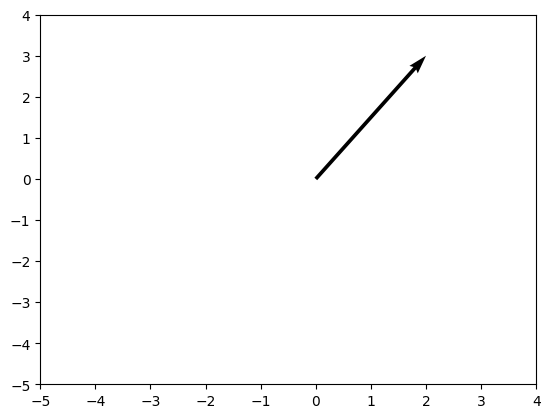

In [7]:
def plot_complex_number(z):
    """
    Plots the complex number z as a radius vector in the 2D space
    """
    plt.quiver(0, 0, z.real, z.imag, angles = "xy", scale_units = "xy", scale = 1)
    plt.xticks(range(-5, 5))
    plt.yticks(range(-5, 5))
plot_complex_number(2 + 3j)

How about many numbers? We'll need to get a little bit more creative. First, we need to create a 2D array, each element of which will be a 4-element array: `[0, 0, z.real, z.imag]`. Next, `plt.quiver()` can accept a range of values. Look at [this StackOverflow post](https://stackoverflow.com/questions/12265234/how-to-plot-2d-math-vectors-with-matplotlib) for details and adapt your code.

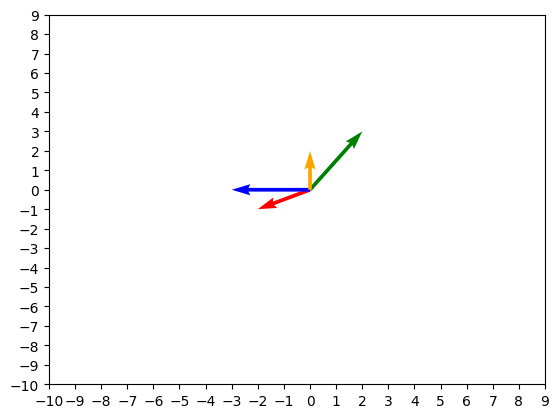

In [26]:
def plot_complex_numbers(numbers, colors):
    """
    Plots the given complex numbers as radius vectors in the 2D space
    """
    zeros = [0] * len(numbers)
    real_parts = [number.real for number in numbers]
    imag_parts = [number.imag for number in numbers]
    plt.quiver(zeros, zeros, real_parts, imag_parts, angles = "xy", scale_units = "xy", color = colors, scale=1)
    plt.xticks(range(-10, 10))
    plt.yticks(range(-10, 10))
    plt.show()
plot_complex_numbers([2 + 3j, -2 - 1j, -3, 2j], ["green", "red", "blue", "orange"])

Now let's add two numbers and plot the result.

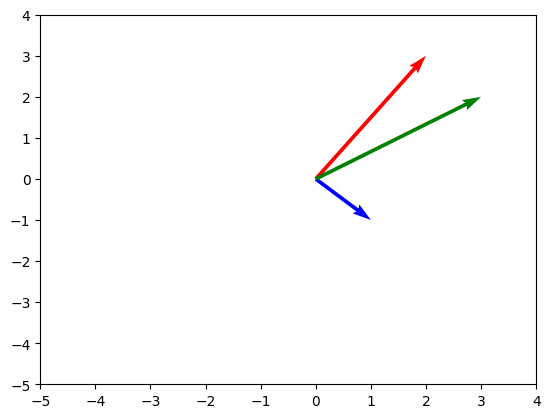

In [17]:
z1 = 2 + 3j
z2 = 1 - 1j
plot_complex_numbers([z1, z2, z1 + z2], ["red", "blue", "green"])

We can see that adding the complex numbers is equivalent to adding vectors (remember the "parallelogram rule"). As special cases, let's try adding pure real and pure imaginary numbers:

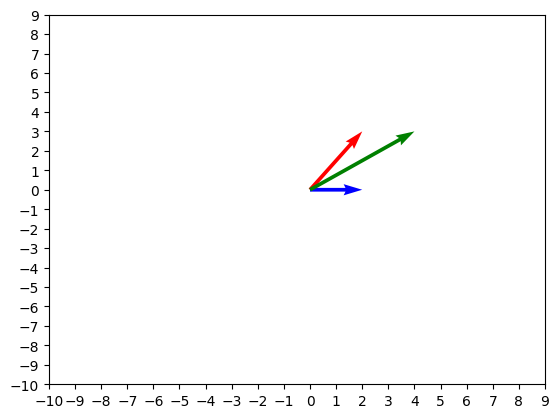

In [25]:
z1 = 2 + 3j
z2 = 2 + 0j
plot_complex_numbers([z1, z2, z1 + z2], ["red", "blue", "green"])

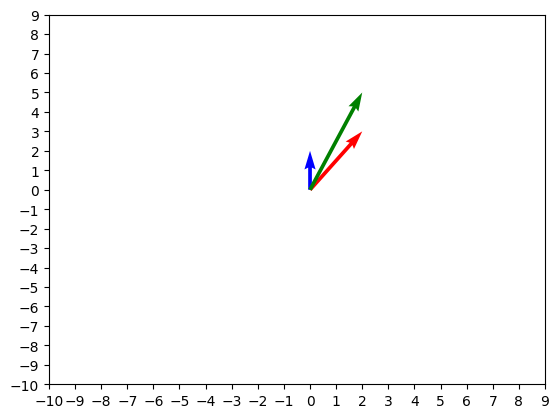

In [24]:
z1 = 2 + 3j
z2 = 0 + 2j
plot_complex_numbers([z1, z2, z1 + z2], ["red", "blue", "green"])

How about multiplication? First we know that multiplying by 1 gives us the same vector and mulpiplying by -1 gives us the reversed version of the same vector. How about multiplication by $\pm i$?

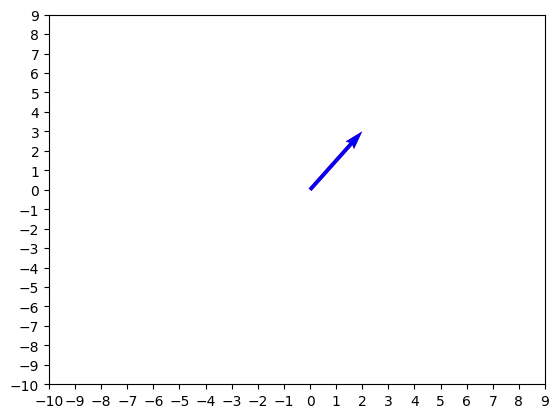

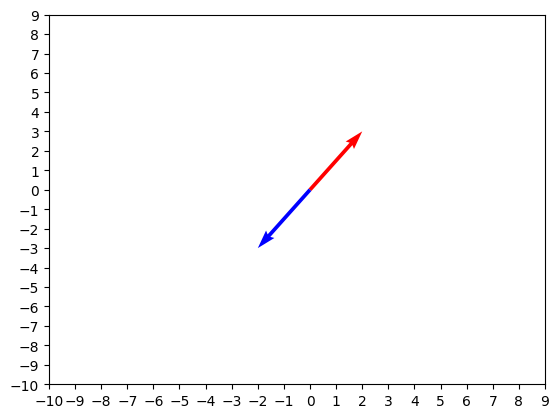

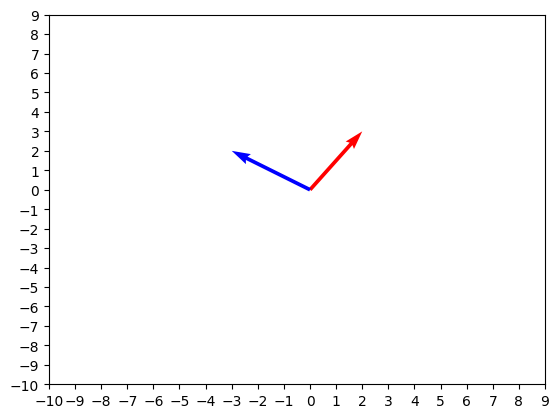

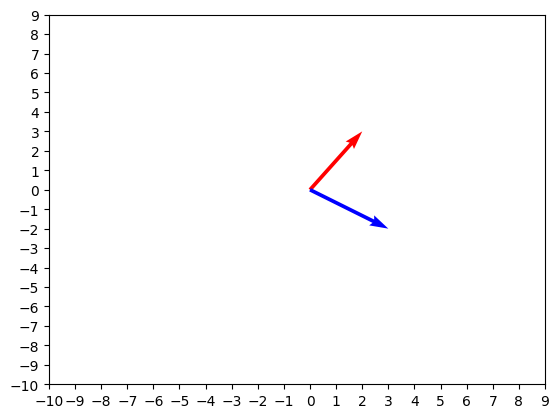

In [27]:
z = 2 + 3j
plot_complex_numbers([z, z * 1], ["red", "blue"])
plot_complex_numbers([z, z * -1], ["red", "blue"])
plot_complex_numbers([z, z * 1j], ["red", "blue"])
plot_complex_numbers([z, z * -1j], ["red", "blue"])

So, multiplication by $i$ is equivalent to 90-degree rotation. We can actually see the following equivalence relationships between multiplying numbers and rotation about the origin:

| Real | Imaginary | Result rotation |
|------|-----------|-----------------|
| 1    | 0         | $0^\circ$       |
| 0    | 1         | $90^\circ$      |
| -1   | 0         | $180^\circ$     |
| 0    | -1        | $270^\circ$     |

Once again, we see the power of abstraction and algebra in practice. We know that complex numbers and 2D vectors are equivalent. Now we see something more: addition and multiplication are equivalent to translation (movement) and rotation!

Let's test the multiplication some more. We can see the resulting vector is the sum of the original vectors, but *scaled and rotated*:

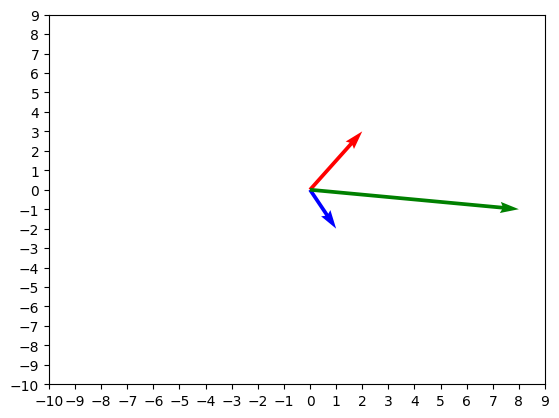

In [28]:
z1 = 2 + 3j
z2 = 1 - 2j
plot_complex_numbers([z1, z2, z1 * z2], ["red", "blue", "green"])

\* **Bonus:** How do **complex numbers** and **rotations** relate? 

### Problem 4. Fundamental Theorem of Algebra
Consider a polynomial like $x^4 - 2x^2 + 1$. How many roots does it have? Try factoring it out, or just find the solutions using `numpy` or `sympy`. Plot them as dots (on the complex plain), or as their corresponding radius-vectors.

Now, try out the solutions to $x^3$, $x^4$, and $x^5$.

Try out different polynomials with real coefficients, or higher degrees (try out 5th, 6th, etc. - just to get a feel). What do you observe about their roots? What do you think about the _geometry_ of the visualization?

In [34]:
x = sympy.symbols("x")
sympy.solve(x ** 4 - 2 * (x ** 2) + 1)

[-1, 1]

In [33]:
sympy.solve(x ** 3 + 5 * x ** 2 - 1)

[-5/3 - 25/(3*(-1/2 - sqrt(3)*I/2)*(223/2 + 3*sqrt(1419)*I/2)**(1/3)) - (-1/2 - sqrt(3)*I/2)*(223/2 + 3*sqrt(1419)*I/2)**(1/3)/3,
 -5/3 - (-1/2 + sqrt(3)*I/2)*(223/2 + 3*sqrt(1419)*I/2)**(1/3)/3 - 25/(3*(-1/2 + sqrt(3)*I/2)*(223/2 + 3*sqrt(1419)*I/2)**(1/3)),
 -5/3 - (223/2 + 3*sqrt(1419)*I/2)**(1/3)/3 - 25/(3*(223/2 + 3*sqrt(1419)*I/2)**(1/3))]

In [35]:
sympy.solve(x ** 2  - 1)

[-1, 1]

In [36]:
sympy.solve(x ** 5  - 1)

[1,
 -1/4 + sqrt(5)/4 - I*sqrt(sqrt(5)/8 + 5/8),
 -1/4 + sqrt(5)/4 + I*sqrt(sqrt(5)/8 + 5/8),
 -sqrt(5)/4 - 1/4 - I*sqrt(5/8 - sqrt(5)/8),
 -sqrt(5)/4 - 1/4 + I*sqrt(5/8 - sqrt(5)/8)]

### Problem 5. Recursion and Fractals
<img src="recursion.jpg" style="max-height: 230px" />

> "To understand recursion, you first need to understand recursion."

There are three main parts to a recursive function:
1. Bottom - when the recursion should finish
2. Operation - some meaningful thing to do
3. Recursive call - calling the same function
4. Clean-up - returning all data to its previous state (this reverses the effect of the operation)

Let's do one of the most famous recursion examples. The most trivial function to recreate is the **factorial**. Derive (or look up) a recurrent definition of the factorial of a non-negative integer and implement it.

**There is a one-to-one correspondence between loops and recursion.** Use this correspondence to create an iterative definition (one which uses loops) and compare both. Test that they return the same results.

**Note:** Think how Python handles very large integers.

In [39]:
def factorial_recursive(n):
    """
    Computes the factorial of a non-negative number n (using recursion)
    """
    if n == 0:
        return 1  
    return n * factorial_recursive(n - 1) 
def factorial_iterative(n):
    """
    Computes the factorial of a non-negative number n (using iteration)
    """
    result = 1
    for i in range(1, n + 1):
        result *= i
    return result

#### Endless sequences
A very famous recursive definition gives us natural numbers (by (the Peano axioms)[https://en.wikipedia.org/wiki/Peano_axioms]). How can we recreate this using Python? Obviously, we cannot put an infinite sequence in a list. However, we can do something else: define the entire sequence and take only parts of it.

Devise a way to define all natural numbers, using the function signature below. Use this to define a smaller, but just as infinite, sequence of even numbers. **Hint:** If you're very stuck, think about the problem hard and it will finally _yield_ to your efforts.

In [41]:
def nat():
    """Returns all natural numbers"""
    n = 1
    while True:
        yield n
        n += 1

def even():
    """Returns all even numbers"""
    n = 2
    while True:
        yield n
        n += 2

Use the approach above to rewrite the factorial function in a "lazy" way.

In [42]:
def factorial_new(n):
    # Write your own docstring as showing it here will be too much of a hint :)
    # Don't forget to also write the code :D
    fact = 1
    n = 0
    while True:
        yield fact  
        n += 1
        fact *= n 

Use **the same approach** to return the Fibonacci sequence - another famous one in mathematics. Given `n`, produce all Fibonacci numbers from $F_1$ up to $F_n$, inclusive.

In [43]:
def fibonacci(n):
    # Write your docstring and code
    a, b = 1, 1  
    for _ in range(n):
        yield a  
        a, b = b, a + b

#### The Mandelbrot set
Now, let's get to something more beefy. The Mandelbrot set is defined by repeatedly squaring complex numbers. It turns out that it produces a **fractal** - a self-similar structure. Follow a tutorial to create (and possibly visualize) the Mandelbrot set. I think [this one](https://medium.com/swlh/visualizing-the-mandelbrot-set-using-python-50-lines-f6aa5a05cf0f) is a good starting point.

In [44]:
def mandelbrot(c, max_iter):
    z = 0
    for i in range(max_iter):
        z = z**2 + c
        if abs(z) > 2:  
            return i
    return max_iter

#### * Optional problem
Try to recreate a Lindermeyer system (also known as **L-system**, [source](https://en.wikipedia.org/wiki/L-system)). These are systems created via a series of replacement rules. 

In [45]:
def l_system(axiom, rules, iterations):

    for _ in range(iterations):
        axiom = "".join(rules.get(char, char) for char in axiom)
    return axiom

### Problem 6. Run-length Encoding
One application of algebra and basic math can be **compression**. This is a way to save data in less space than it originally takes. The most basic form of compression is called [run-length encoding](https://en.wikipedia.org/wiki/Run-length_encoding).

Write a function that encodes a given text. Write another one that decodes.

We can see that RLE is not very useful in the general case. But it can be extremely useful if we have very few symbols. An example of this can be DNA and protein sequences. DNA code, for example, has only 4 characters.

Test your encoding and decoding functions on a DNA sequence (you can look up some on the Internet). Measure how much your data is compressed relative to the original.

In [47]:
def encode(text):
    """
    Returns the run-length encoded version of the text
    (numbers after symbols, length = 1 is skipped)
    """
    encoded = []
    count = 1
    
    for i in range(1, len(text)):
        if text[i] == text[i - 1]:
            count += 1
        else:
            encoded.append(text[i - 1] + (str(count) if count > 1 else ""))
            count = 1

    encoded.append(text[-1] + (str(count) if count > 1 else ""))
    
    return "".join(encoded)

def decode(text):
    """
    Decodes the text using run-length encoding
    """
    decoded = []
    pattern = re.compile(r"([A-Za-z])(\d*)") 
    
    for letter, num in pattern.findall(text):
        decoded.append(letter * (int(num) if num else 1))  
    
    return "".join(decoded)

In [56]:
# Tests
# Test that the functions work on their own
assert encode("AABCCCDEEEE") == "A2BC3DE4"
assert decode("A2BC3DE4") == "AABCCCDEEEE"

# Test that the functions really invert each other
assert decode(encode("AABCCCDEEEE")) == "AABCCCDEEEE"
assert encode(decode("A2BC3DE4")) == "A2BC3DE4"